<a href="https://colab.research.google.com/github/tejaswini-meshram/Ev-Market-Analysis-Feynn-labs-Internship/blob/main/EV_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df1=pd.read_csv("/content/drive/MyDrive/content/behavioural_segment_data.csv")
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [30]:
df2=pd.read_csv("/content/drive/MyDrive/content/final_dataset.csv")
df2.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [5]:

# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (99, 8)
DF2 Shape:  (32, 13)


In [6]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<<-------------------------------DATASET 1 ---------------------------->>>')
print(df1.info())
print(' <<<-------------------------------DATASET 2 ---------------------------->>>')
print(df2.info())

 <<<-------------------------------DATASET 1 ---------------------------->>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB
None
 <<<-------------------------------DATASET 2 ---------------------------->>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0  

In [7]:

# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


'<<< DATASET 2 >>>'

,Unnamed: 0,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,24.000000
mean,15.500000,8829.437500,20224.562500,822.96875,94.875000,63.718750,12.81250,0.187500,12.406250,137.875000,30198.843750,57.666667
std,9.380832,15027.420445,49311.798762,1661.50339,287.596912,161.503467,60.76047,0.470929,65.050283,377.119879,54220.859227,69.800752
min,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,7.750000,68.500000,31.500000,13.75000,1.750000,0.750000,0.00000,0.000000,0.000000,1.000000,1323.000000,7.750000
50%,15.500000,1984.500000,1992.000000,131.50000,10.000000,12.500000,0.00000,0.000000,0.000000,11.000000,11156.500000,25.000000
75%,23.250000,10306.500000,17007.250000,638.50000,31.250000,40.000000,1.00000,0.000000,0.000000,58.000000,45205.000000,80.250000
max,31.000000,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.00000,2.000000,368.000000,1602.000000,276217.000000,265.000000


# **Analysis of 2-wheeler EVs**               
Observation: Maharashtra, Rajasthan, Tamilnadu and Karnataka are among the top states with the majority of EV 2-wheelers while Manipur, Meghalaya, Mizoram and Nagaland  with the least.

<ipython-input-8-030b9260e5dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=df2["Two Wheeler"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')


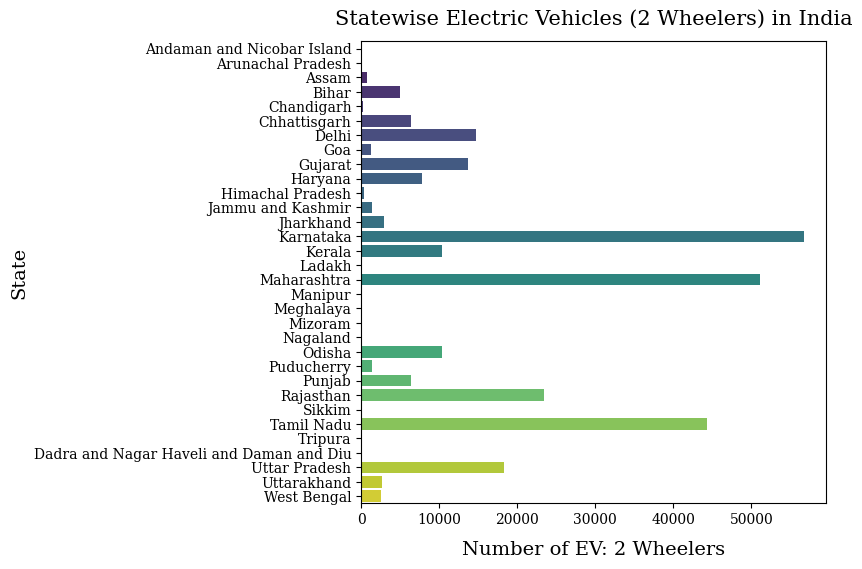

In [8]:
# 2 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, x=df2["Two Wheeler"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# **Analysis of 3-wheeler EVs**               
Observation: Uttar Pradesh and Delhi are among the top states with Uttar Pradesh being the highest with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

<ipython-input-9-547396a15728>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=df2["Three Wheeler"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')


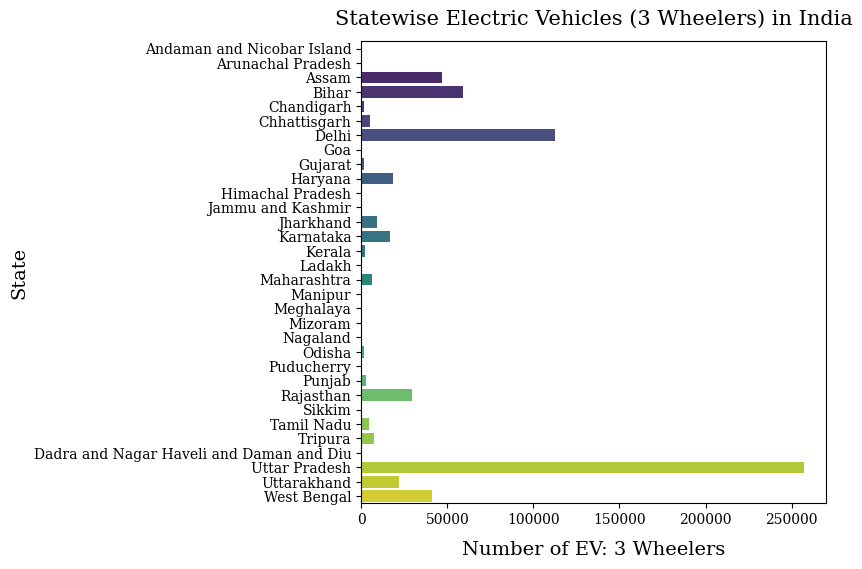

In [9]:
# 3 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, x=df2["Three Wheeler"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# **Analysis of 4-wheeler EVs**               
Observation: Karnatak, Kerela, Ladak, Delhi and Sikkim are among the top states with Karnatak being the highest with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

<ipython-input-10-ac3b4808349d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=df2["Four Wheeler"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')


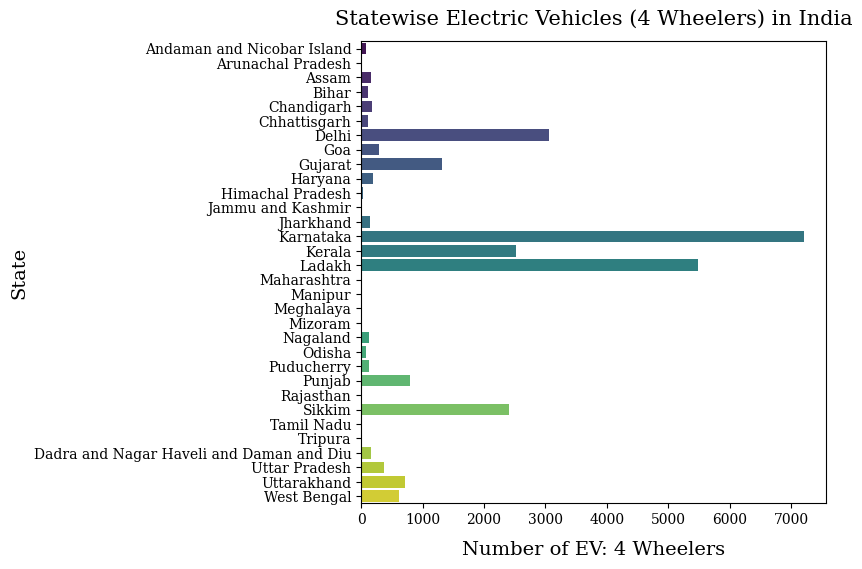

In [10]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, x=df2["Four Wheeler"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

## Analysis of number of charging station by states             
Observation: Maharashtra, Delhi and Tamil Nadu are among the top states with Maharashtra being the highest with the majority number of charging stations while the remaining states have less number of charging stations comparatively.

<ipython-input-31-af14e5d7c817>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=df2["total-charging-stations"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')


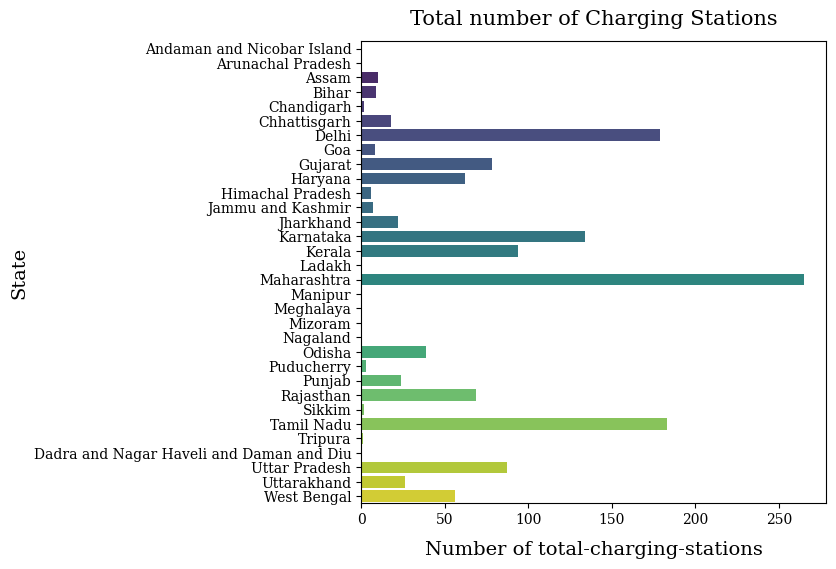

In [31]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, x=df2["total-charging-stations"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of total-charging-stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Total number of Charging Stations', weight=200, family='serif', size=15, pad=12)
plt.show()

## Analysis of total number of EV by states             
Observation: Uttar Pradesh has the highest number of electric vehicles as compared to other states of India followed by Delhi.

<ipython-input-12-90aebdff24a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=df2["Grand Total"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')


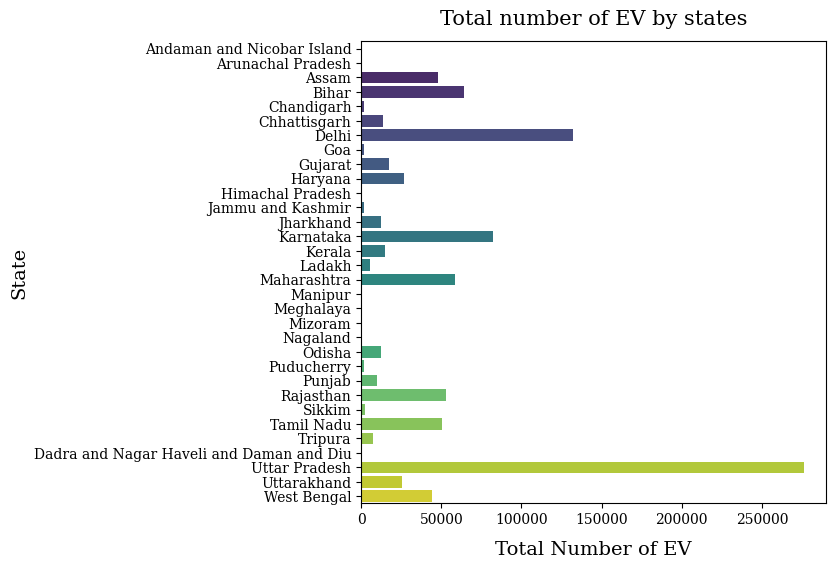

In [12]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, x=df2["Grand Total"].sort_values(ascending=True), y=df2['State Name'], palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Total Number of EV', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Total number of EV by states', weight=200, family='serif', size=15, pad=12)
plt.show()

## Analysis Marrital Status for EV market             
Observation: From the below visual we can say that majority i.e 84.85% of EV market is occupied by Married customers and only 15.15% is single people EV Market.

In [13]:
df1['Marrital Status']=df1['Marrital Status'].replace([0,1],['Single','Married'])
marrital_status=df1['Marrital Status'].value_counts()
marrital_status=pd.DataFrame({'marrital_status':marrital_status.index,'count':marrital_status.values})
marrital_status

,marrital_status,count
0,Married,84
1,Single,15


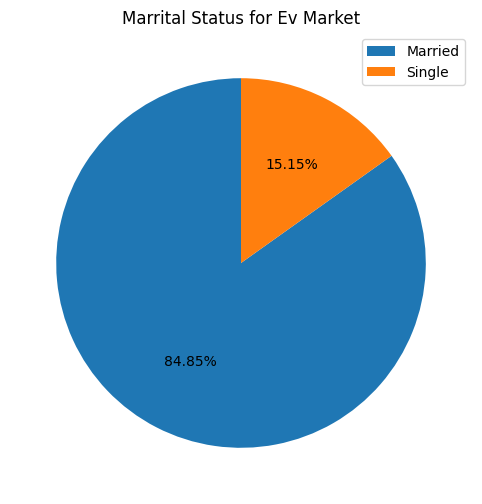

In [14]:
plt.figure(figsize=(10,6))
plt.pie(data=marrital_status, x=marrital_status.loc[:,'count'],startangle=90,autopct='%1.2f%%')
plt.legend(marrital_status.loc[:,'marrital_status'])
plt.title("Marrital Status for Ev Market",color='black')
plt.show()

## Analysis based on Profession for EV market             
Observation: From the below visual we can say that more than half i.e 64.65% of EV market is occupied by Business professional customers and 35.35% is salary professionals in EV Market.

In [15]:
df1['Profession']=df1['Profession'].replace([0,1],['Salaried','Business'])
profession_status=df1['Profession'].value_counts()
profession_status=pd.DataFrame({'profession_status':profession_status.index,'count':profession_status.values})
profession_status

,profession_status,count
0,Salaried,64
1,Business,35


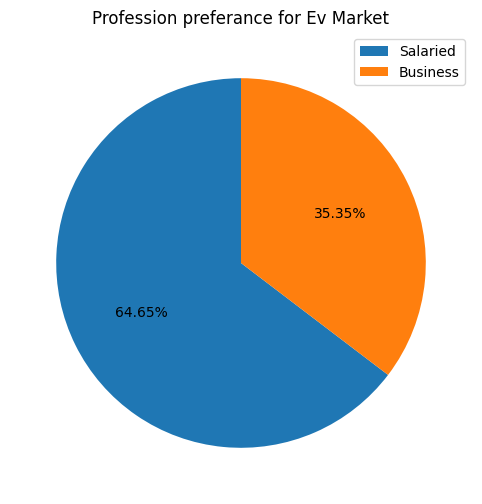

In [16]:
plt.figure(figsize=(10,6))
plt.pie(data=profession_status, x=profession_status.loc[:,'count'],startangle=90,autopct='%1.2f%%')
plt.legend(profession_status.loc[:,'profession_status'])
plt.title("Profession preferance for Ev Market",color='black')
plt.show()

## Correlation Matrix for dataset 2            
Observation: From the below visual we can say that

*   total number of EV in state is highly dependent on number of three wheelers (with 96% correlation).

*   total number of charging station in state is highly dependent on number of two wheelers(with 85% correlation).




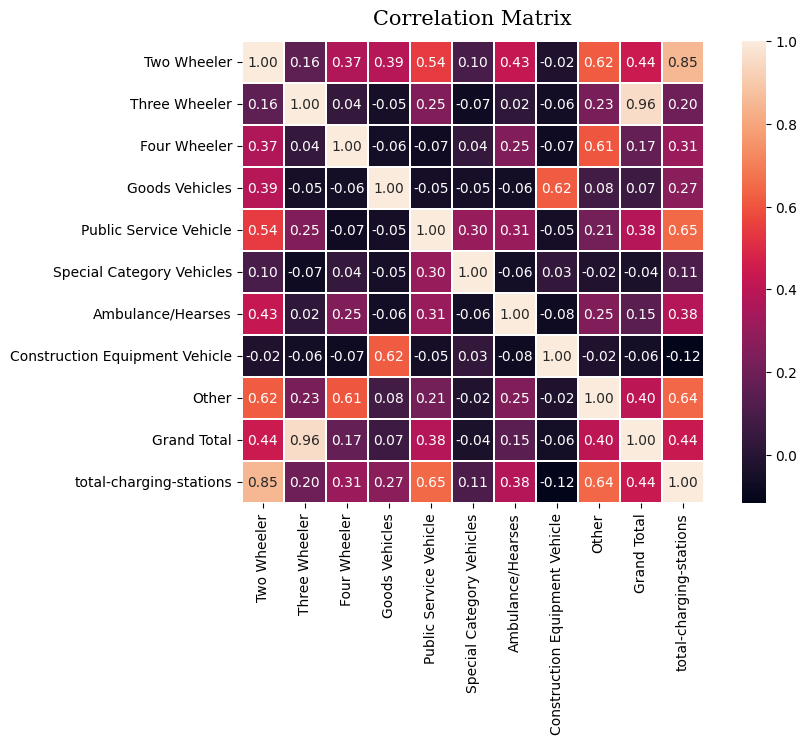

In [17]:
# plotting the correlation matrix from dataset 2
corr_df2=df2[["Two Wheeler", "Three Wheeler","Four Wheeler","Goods Vehicles","Public Service Vehicle", "Special Category Vehicles",
             "Ambulance/Hearses" ,"Construction Equipment Vehicle", "Other","Grand Total","total-charging-stations"
             ]]
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_df2.corr(), annot=True, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

# **Model Building Using K-Means Clusteing**

In [32]:
# replace all the nan values with appropriate replacement
df2['total-charging-stations'].fillna(0,inplace=True)

In [33]:
# selecting features for building a model
X= df2[['Two Wheeler',	'Three Wheeler',	'Four Wheeler',	'Goods Vehicles','Public Service Vehicle',	'Special Category Vehicles',
       'Ambulance/Hearses',	'Construction Equipment Vehicle',	'Other',	'Grand Total',	'total-charging-stations']]

In [34]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:

# applying Principle Component Analysis (PCA)
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10','PC11'])
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.324952,-0.228003,-0.127616,0.139725,-0.131634,-0.234399,-0.264052,-0.014425,0.036993,-0.157067,1.641003e-16
1,-1.423953,-0.211914,-0.109232,0.028287,-0.127641,-0.241924,-0.136694,-0.135327,0.087583,-0.059785,3.908816e-16
2,-0.694092,-0.777114,0.778608,-0.133398,0.019541,-0.006351,0.059295,-0.061392,0.040532,-0.024471,-2.179025e-17
3,-0.371826,-0.890041,1.026736,-0.132361,0.022062,-0.008146,0.148578,0.009436,0.271093,-0.047628,4.801162e-18
4,-1.274186,-0.240840,-0.121515,0.114333,-0.111440,-0.220897,-0.242656,0.028802,0.023350,-0.128206,-3.690264e-17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

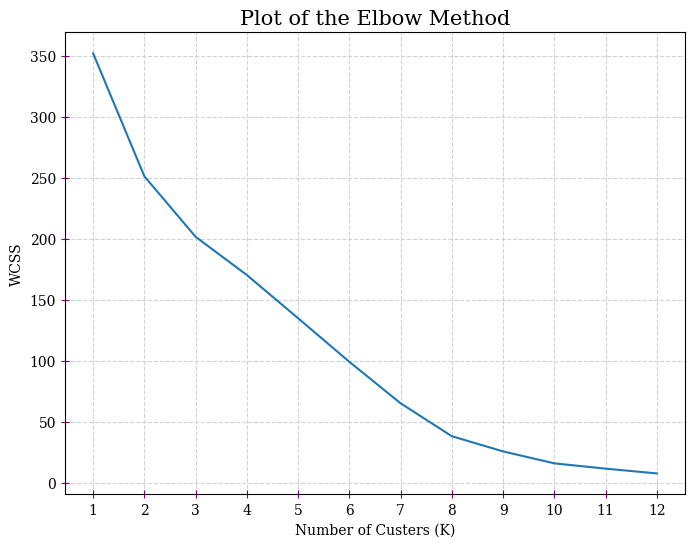

In [41]:
# plotting the results of Elbow

wcss = []

for i in range(1, 13):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 13), wcss)
plt.xticks(range(1, 13), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()


In [63]:
# training the model using k=3 as rendered by the above plot
kmean = KMeans(n_clusters=3, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=90)

In [64]:
# check the labels assigned to each data point
print(kmean.labels_)

[1 1 1 1 1 2 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1]


In [60]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    28
1     4
Name: count, dtype: int64

In [65]:
# adding a new feature of cluster labels to the dataset 3
df2['clusters'] = kmean.labels_

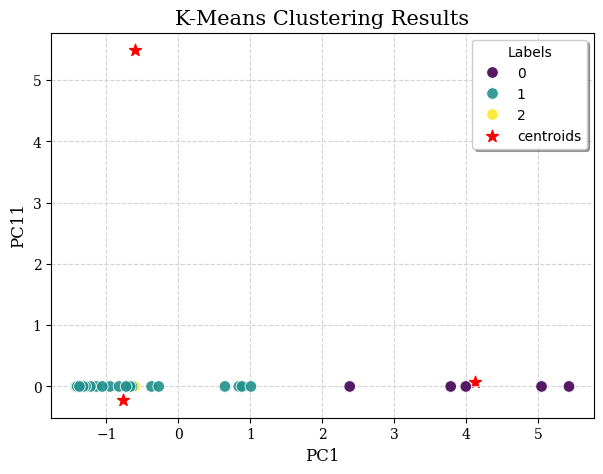

In [66]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC11', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC11', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()